In [2]:
df3 = pd.read_csv("C:/Users/user/Downloads/한국자산관리공사_국유부동산 매각현황_20211231.csv", encoding='cp949')

In [4]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


In [5]:
team_name = []

for o in df['팀명'].unique():
    m = df['팀명'] == o
    df_mask = df[m]
    
    team_name.append([o, df_mask['대장금액(원)'].sum()])

In [6]:
team_name_res = pd.DataFrame(team_name, columns = ['팀명', '대장금액(원)'])

In [7]:
team_name_res

,팀명,대장금액(원)
0,국유재산관리1팀,672337531531
1,국유울산팀,59449096732
2,국유재산관리2팀,726990294337
3,국유춘천팀,39290467064
4,국유목포팀,14225212289
...,...,...
61,평택지사,49150603287
62,의정부지사,56800825659
63,원주지사,9902403633
64,춘천지사,16990377653


In [16]:
df2 = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })


AttributeError: 'DataFrame' object has no attribute '대장금액'

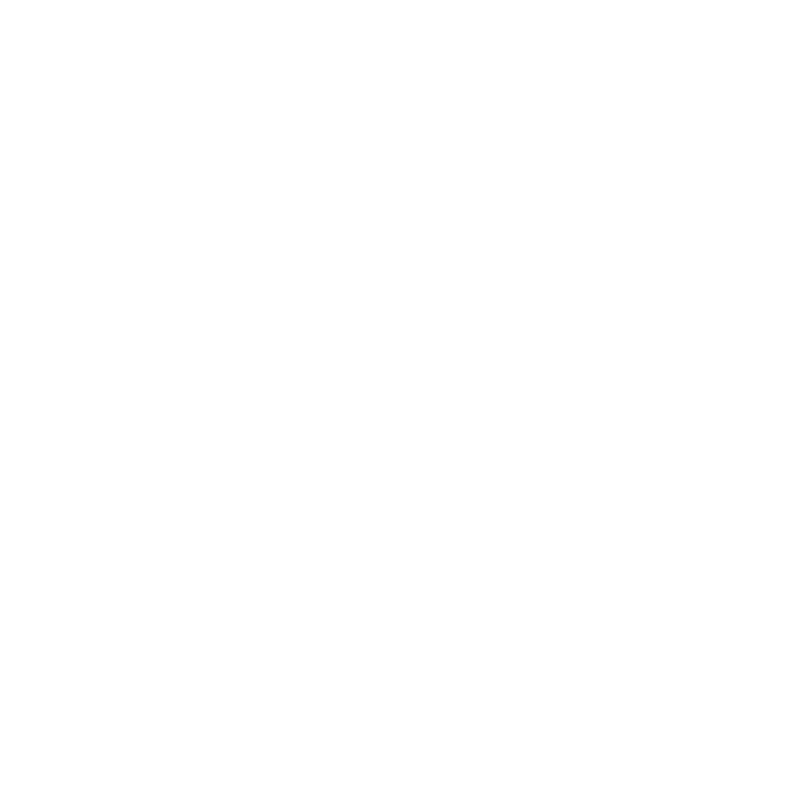

In [15]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Reorder the dataframe
df = team_name_res.sort_values(by=['대장금액(원)'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['대장금액(원)'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.대장금액(원) + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["팀명"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [13]:
df

,팀명,대장금액(원)
65,해안면무주지국유화지원추진단,22101960
41,기획관리팀,448202500
47,국유통영지부,2835397438
45,춘천지부,4954916510
42,원주지부,5292361984
...,...,...
38,국유재산2팀,627778397197
0,국유재산관리1팀,672337531531
2,국유재산관리2팀,726990294337
34,국유재산1팀,746857030549


In [17]:
df2

,Name,Value
0,item 1,89
1,item 2,23
2,item 3,69
3,item 4,53
4,item 5,27
5,item 6,44
6,item 7,11
7,item 8,29
8,item 9,76
9,item 10,28


([<matplotlib.axis.XTick at 0x164d9f07a30>,
 [Text(1, 0, '해안면무주지국유화지원추진단'),
  Text(2, 0, '기획관리팀'),
  Text(3, 0, '국유통영지부'),
  Text(4, 0, '춘천지부'),
  Text(5, 0, '원주지부'),
  Text(6, 0, '국유진주지부'),
  Text(7, 0, '국유통영지사'),
  Text(8, 0, '팀미정'),
  Text(9, 0, '국유제주팀'),
  Text(10, 0, '국유 안동팀'),
  Text(11, 0, '국유여수지사'),
  Text(12, 0, '원주지사'),
  Text(13, 0, '국유여수지부'),
  Text(14, 0, '국유여수팀'),
  Text(15, 0, '국유1팀'),
  Text(16, 0, '군산지사'),
  Text(17, 0, '국유진주지사'),
  Text(18, 0, '국유제주지사'),
  Text(19, 0, '국유목포팀'),
  Text(20, 0, '충주지사'),
  Text(21, 0, '안동지부'),
  Text(22, 0, '국유목포지부'),
  Text(23, 0, '춘천지사'),
  Text(24, 0, '포항지사'),
  Text(25, 0, '국유2팀'),
  Text(26, 0, '국유광주4팀'),
  Text(27, 0, '안동지사'),
  Text(28, 0, '국유목포지사'),
  Text(29, 0, '국유군산팀'),
  Text(30, 0, '국유통영팀'),
  Text(31, 0, '국유광주3팀'),
  Text(32, 0, '포항지부'),
  Text(33, 0, '국유재산관리5팀'),
  Text(34, 0, '국유제주지부'),
  Text(35, 0, '울산지부'),
  Text(36, 0, '국유진주팀'),
  Text(37, 0, '울산지사'),
  Text(38, 0, '의정부지부'),
  Text(39, 0, '국유 충주팀'),
  Text(40, 0, '국유원주

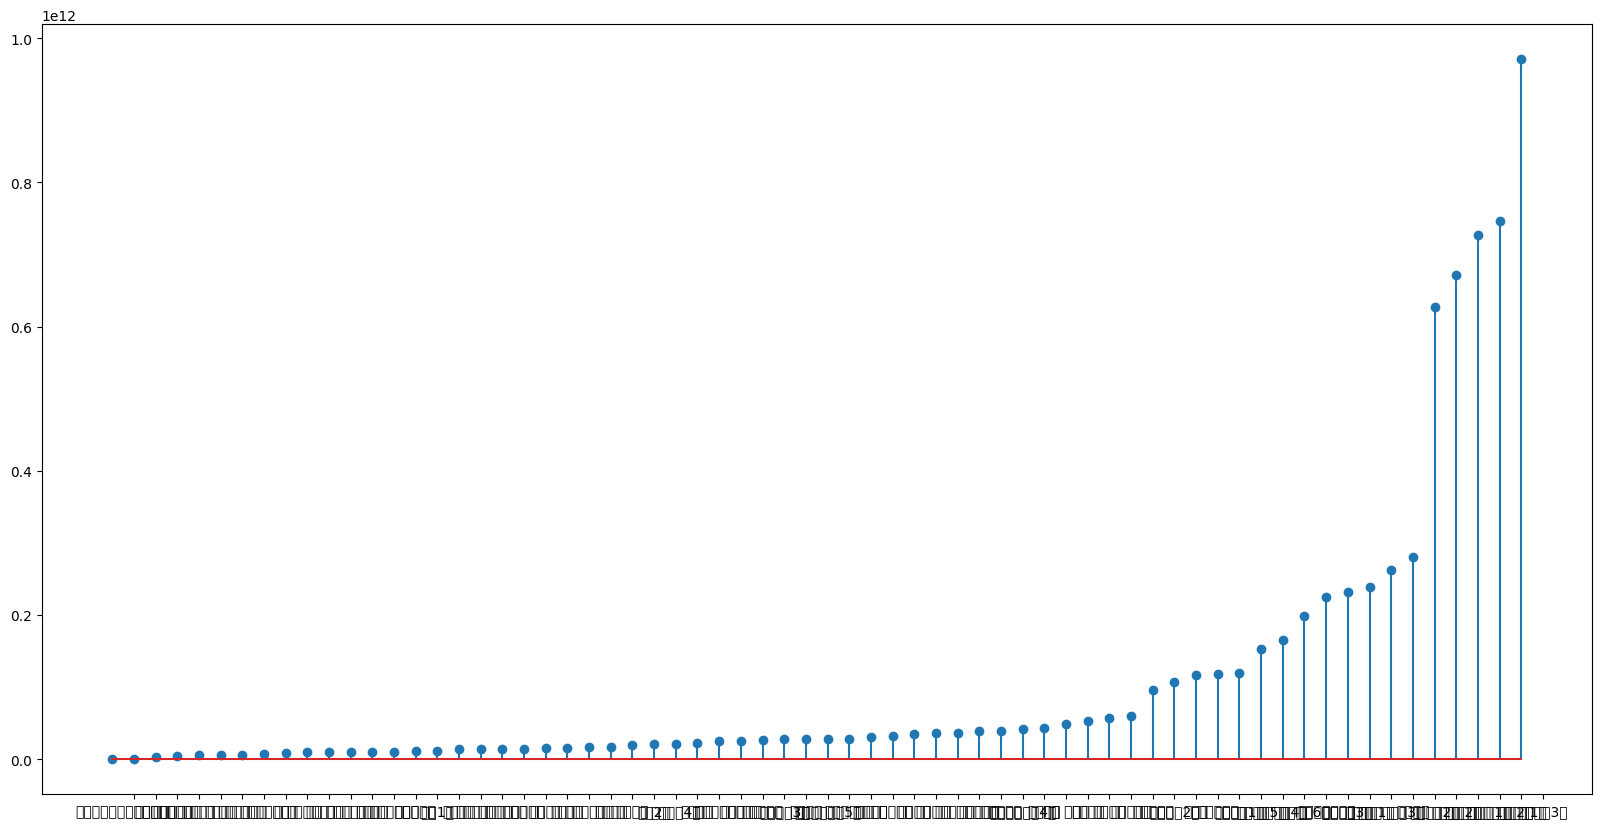

In [19]:
# Create a dataframe
import pandas as pd
plt.figure(figsize=(20,10))
# df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

# Reorder it following the values:
ordered_df = df.sort_values(by='대장금액(원)')
my_range=range(1,len(df.index)+1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Make the plot
plt.stem(ordered_df['대장금액(원)'])
plt.xticks( my_range, ordered_df['팀명'])

In [23]:
plt.rcParams['font.family'] = 'Malgun Gothic'

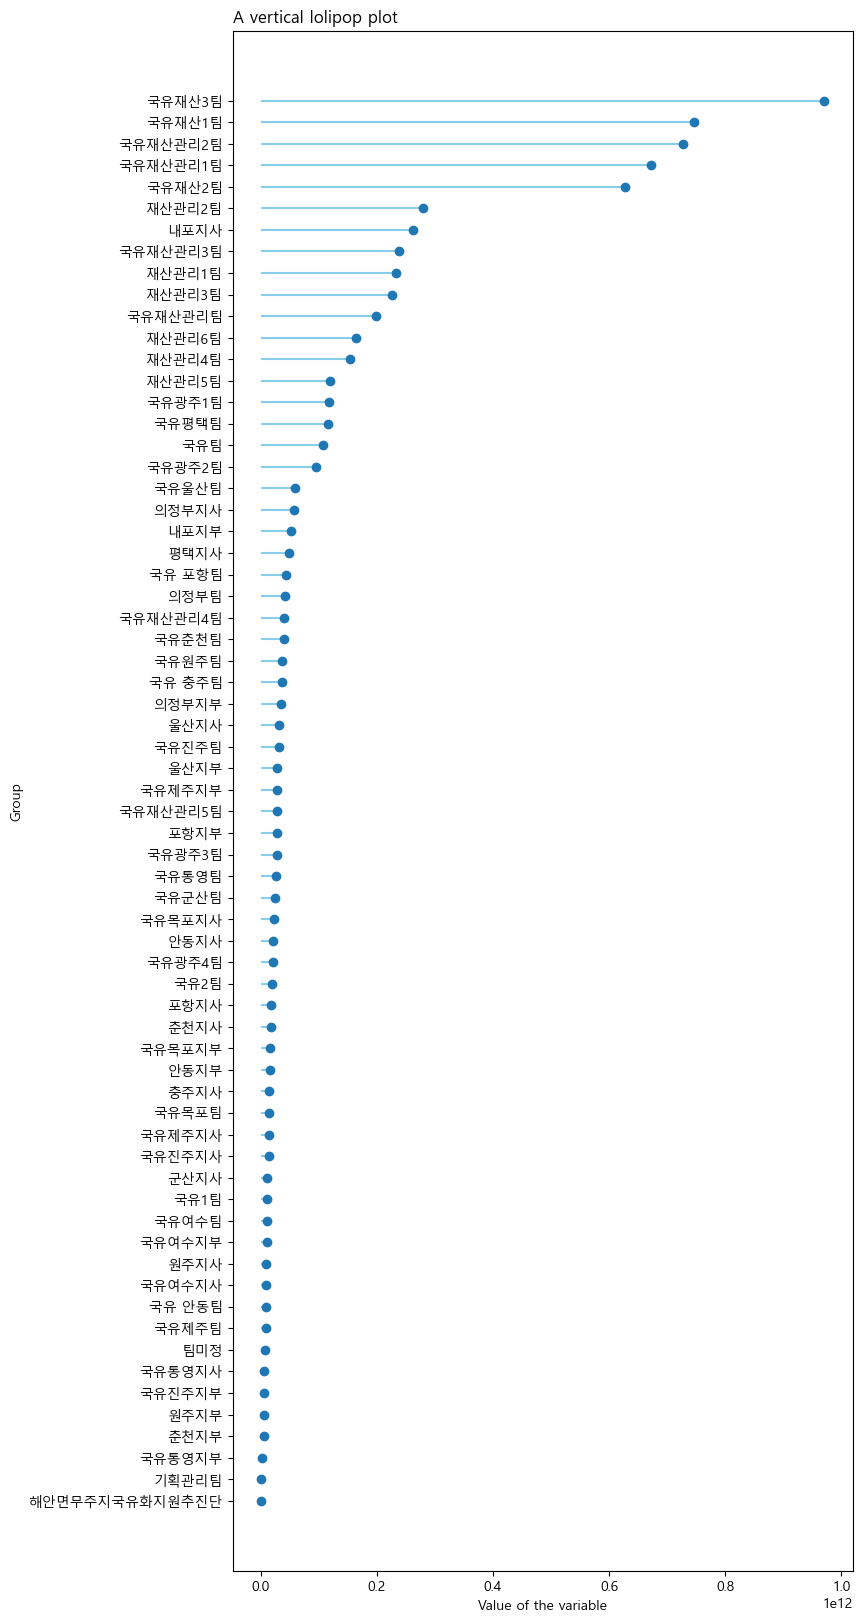

In [29]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,20))

ordered_df = df.sort_values(by='대장금액(원)')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['대장금액(원)'], color='skyblue')
plt.plot(ordered_df['대장금액(원)'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['팀명'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the plot
plt.show()

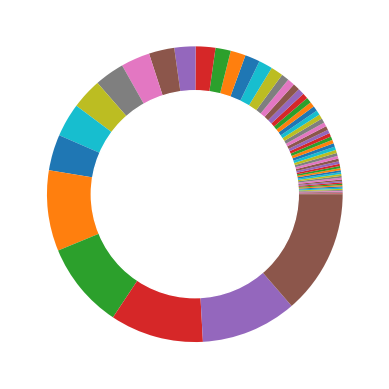

In [33]:
# library
import matplotlib.pyplot as plt

# create data
size_of_groups=[12,11,3,30]

# Create a pieplot
plt.pie(df['대장금액(원)'])

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [31]:
df

,팀명,대장금액(원)
65,해안면무주지국유화지원추진단,22101960
41,기획관리팀,448202500
47,국유통영지부,2835397438
45,춘천지부,4954916510
42,원주지부,5292361984
...,...,...
38,국유재산2팀,627778397197
0,국유재산관리1팀,672337531531
2,국유재산관리2팀,726990294337
34,국유재산1팀,746857030549


In [41]:
!pip install palettable

     -------------------------------------- 111.8/111.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
m = df['대장금액'] > 

In [48]:
df['대장금액(원)'].mean()

107886004881.25757

In [49]:
df['대장금액(원)'].median()

27970231155.0

In [51]:
df[df['대장금액(원)'] > 10000]

,팀명,대장금액(원)
65,해안면무주지국유화지원추진단,22101960
41,기획관리팀,448202500
47,국유통영지부,2835397438
45,춘천지부,4954916510
42,원주지부,5292361984
...,...,...
38,국유재산2팀,627778397197
0,국유재산관리1팀,672337531531
2,국유재산관리2팀,726990294337
34,국유재산1팀,746857030549


In [64]:
df[df['대장금액(원)'] > 71204763221.63]

,팀명,대장금액(원)
8,국유광주2팀,95757595053
7,국유팀,107340099055
22,국유평택팀,116627046395
21,국유광주1팀,117739236874
24,재산관리5팀,118989815957
26,재산관리4팀,153064312082
27,재산관리6팀,165005815365
12,국유재산관리팀,198222072825
14,재산관리3팀,225765808531
23,재산관리1팀,232206998202


In [82]:
m = df['대장금액(원)'] > 71204763221.63
dfm = df[m]

In [83]:
len(dfm)

18

In [55]:
df['대장금액(원)'].sum()

7120476322163

In [70]:
71204763221.63 / 7120476322163 * 100

1.0

In [68]:
1 / 100 * 100

1.0

In [73]:
dfm = df[m]
m = df['대장금액(원)'] <= 71204763221.63
dfnm = df[m]

In [76]:
dfnm['대장금액(원)'].sum()

1064124392245

In [75]:
pd.concat([dfm, dfnm])

,팀명,대장금액(원)
8,국유광주2팀,95757595053
7,국유팀,107340099055
22,국유평택팀,116627046395
21,국유광주1팀,117739236874
24,재산관리5팀,118989815957
...,...,...
18,국유 포항팀,43860394309
61,평택지사,49150603287
11,내포지부,52910573565
62,의정부지사,56800825659


In [ ]:
dfm.append('팀명' : {기타}, '대장금액(원)' : {1064124392245})

In [85]:
dfm.loc[4] = ['기타', 1064124392245 ]


C:\Users\user\AppData\Local\Temp\ipykernel_23060\1132212742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm.loc[4] = ['기타', 1064124392245 ]


In [86]:
len(dfm)

19

In [87]:
dfm

,팀명,대장금액(원)
8,국유광주2팀,95757595053
7,국유팀,107340099055
22,국유평택팀,116627046395
21,국유광주1팀,117739236874
24,재산관리5팀,118989815957
26,재산관리4팀,153064312082
27,재산관리6팀,165005815365
12,국유재산관리팀,198222072825
14,재산관리3팀,225765808531
23,재산관리1팀,232206998202


In [96]:
df2

,Name,Value
0,item 1,89
1,item 2,23
2,item 3,69
3,item 4,53
4,item 5,27
5,item 6,44
6,item 7,11
7,item 8,29
8,item 9,76
9,item 10,28


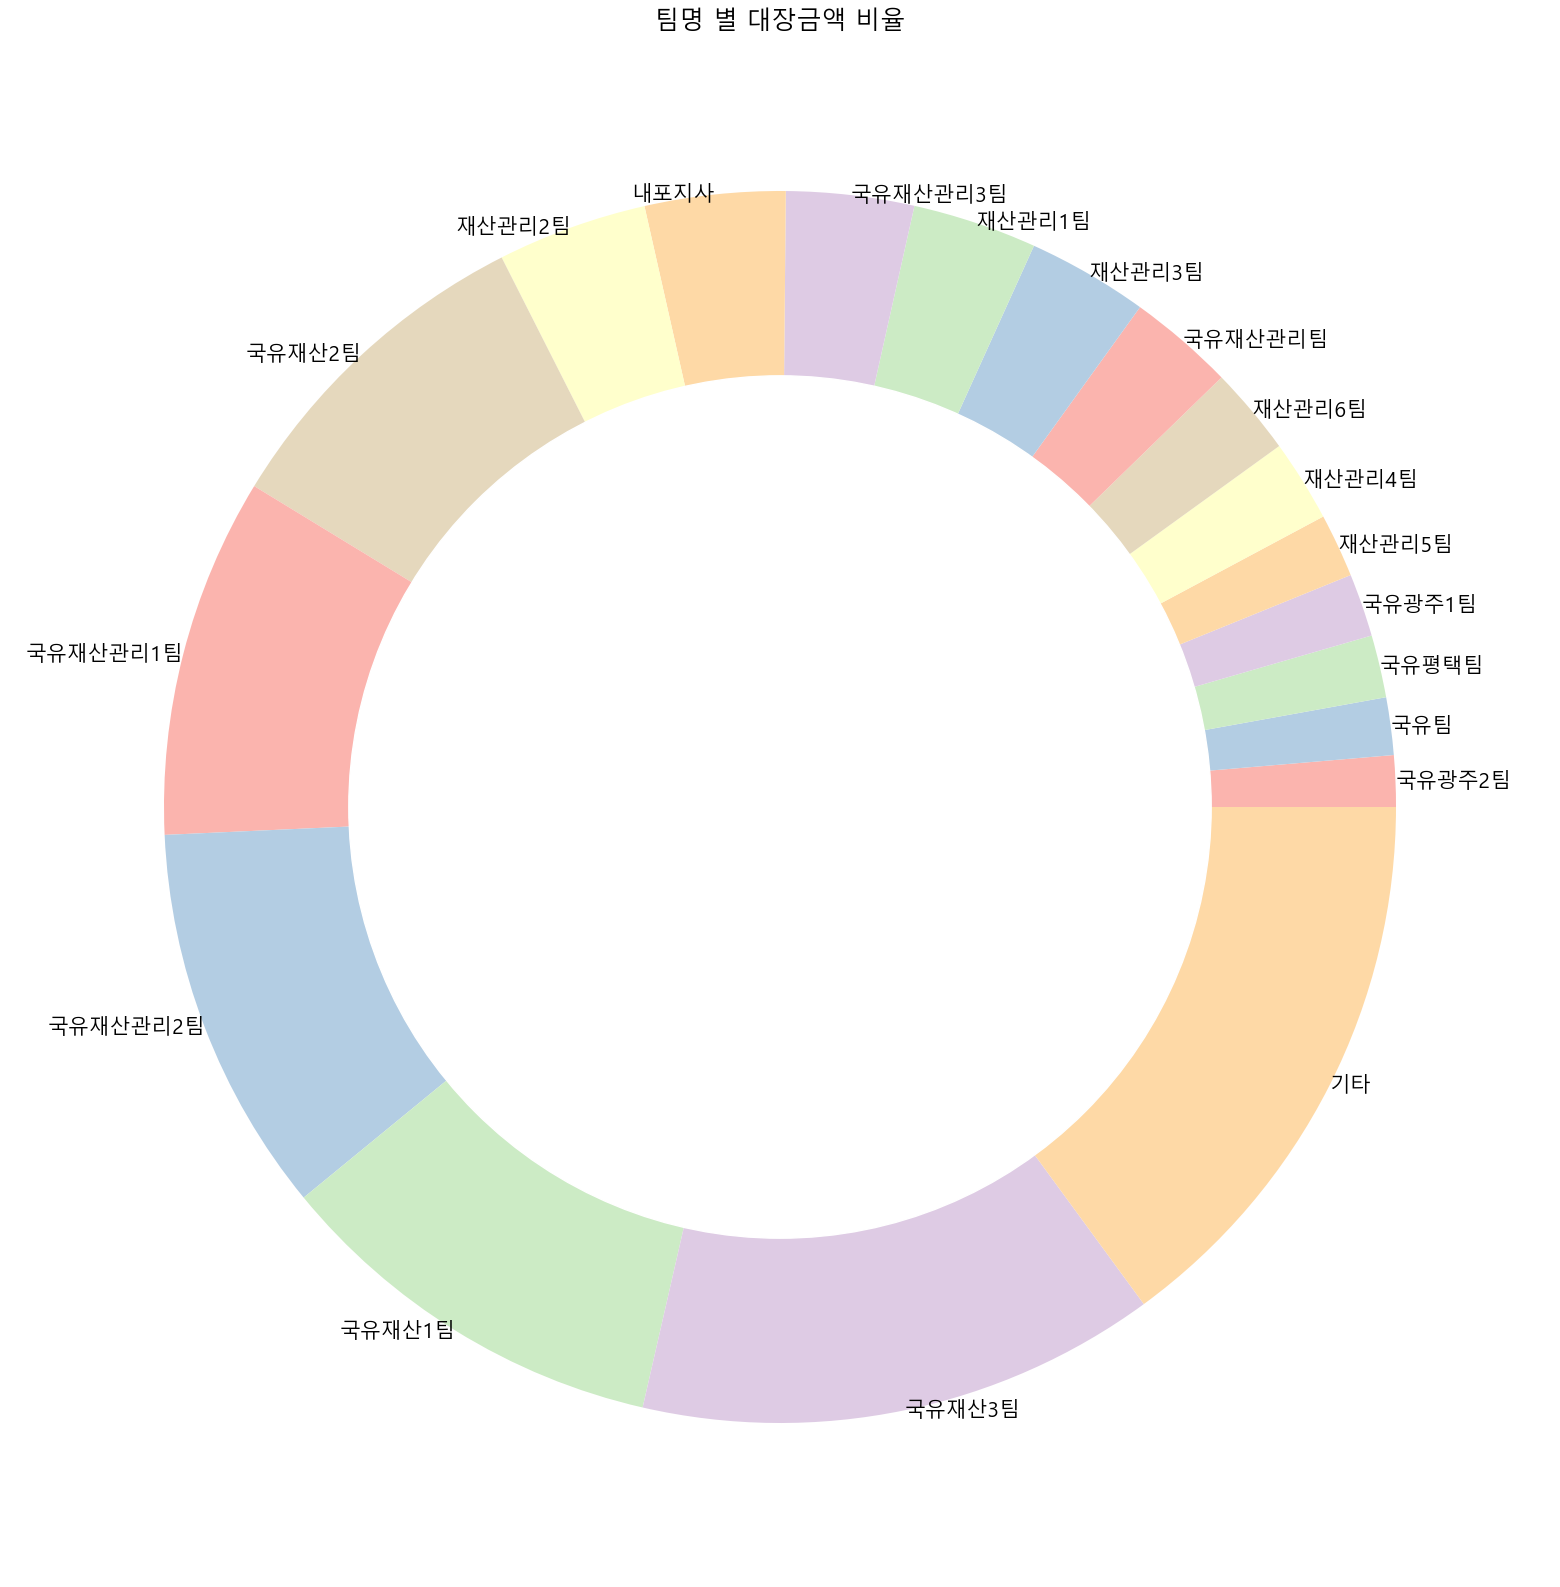

In [95]:
# library
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(20,20))

# create data

names = dfm['팀명']
size = dfm['대장금액(원)']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.rc('font', size=15)        # 기본 폰트 크기
plt.title('팀명 별 대장금액 비율')
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.pie(size, labels=names, labeldistance= 1, colors = Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
# 기타의 기준은 전체 대장금액(원)의 1% 이상은 못넘는 값들만 기타 처리하였음.

In [ ]:
ax1 = plt.subplot()
sns.boxplot(data=df_query, x='처리상태', y='주문수량', color='0.5', ax = ax1)
sns.stripplot(data = df_query, x = '처리상태', y = '주문수량', alpha = 0.1, ax = ax1)

add_stat_annotation(ax,
                   data = df_query,
                   x = '처리상태',
                   y = '주문수량',
                   box_pairs = [(('구매확정'), ('주문취소'))],
                   test = 't-test_ind',
                    text_format='simple',
                   loc = 'inside')